<a href="https://colab.research.google.com/github/Kvaathe/AAMD/blob/main/Trabajo1/lectura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import numpy as np
import struct

Carga el fichero directamente desde el directorio de GitHub

In [ ]:
url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/day.csv"

In [ ]:
dataset = read_csv(url)

Se puede ver en el fichero que no hay datos olvidados, pero es mucho más rápido con la función .isnull(). Como se puede apreciar a continuación, todos los datos han sido rellenados.

In [ ]:
print("Missing values: ", dataset.isnull().sum().sum())
print(dataset.isnull().any())

Missing values:  0
instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


La función .shape muestra el número de filas y columnas del dataset.

In [ ]:
print(dataset.shape)

(731, 16)


La función .head() muestra las primeras 3 instancias del dataset.

In [ ]:
print(dataset.head(3))

   instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0  ...   0.160446     331         654   985
1        2  2011-01-02       1   0  ...   0.248539     131         670   801
2        3  2011-01-03       1   0  ...   0.248309     120        1229  1349

[3 rows x 16 columns]


A continuación, se muestra una descripción de todas las columnas del dataset.

In [ ]:
dataset.pop('instant')

0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64

In [ ]:
print(dataset.describe())

           season          yr  ...   registered          cnt
count  731.000000  731.000000  ...   731.000000   731.000000
mean     2.496580    0.500684  ...  3656.172367  4504.348837
std      1.110807    0.500342  ...  1560.256377  1937.211452
min      1.000000    0.000000  ...    20.000000    22.000000
25%      2.000000    0.000000  ...  2497.000000  3152.000000
50%      3.000000    1.000000  ...  3662.000000  4548.000000
75%      3.000000    1.000000  ...  4776.500000  5956.000000
max      4.000000    1.000000  ...  6946.000000  8714.000000

[8 rows x 14 columns]


La función .groupby() agrupa los datos según la columna que se le indica y .size() cuenta cuantas instancias hay de cada.

In [ ]:
print(dataset.groupby('cnt').size())

cnt
22      1
431     1
441     1
506     1
605     1
       ..
8294    1
8362    1
8395    1
8555    1
8714    1
Length: 696, dtype: int64


A continuación se muestra la cantidad de alquieres hechos por estación del año.

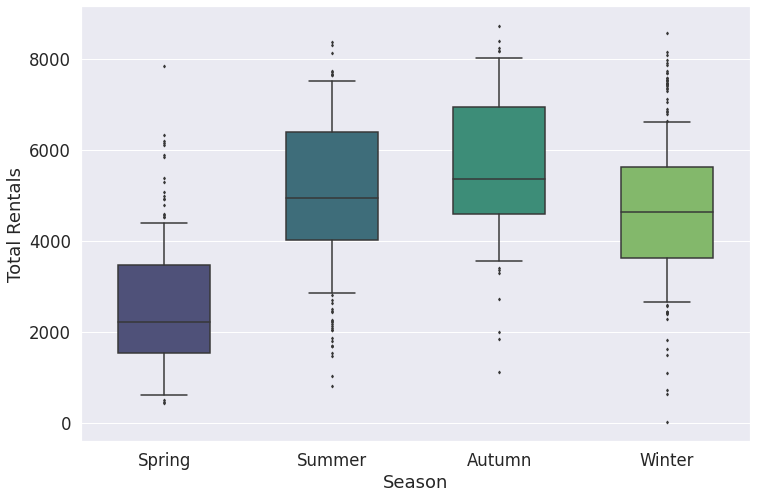

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="season", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
ax.set_xlabel("Season")
ax.set_ylabel("Total Rentals")
pyplot.show()

Lo mismo, pero por día de la semana.

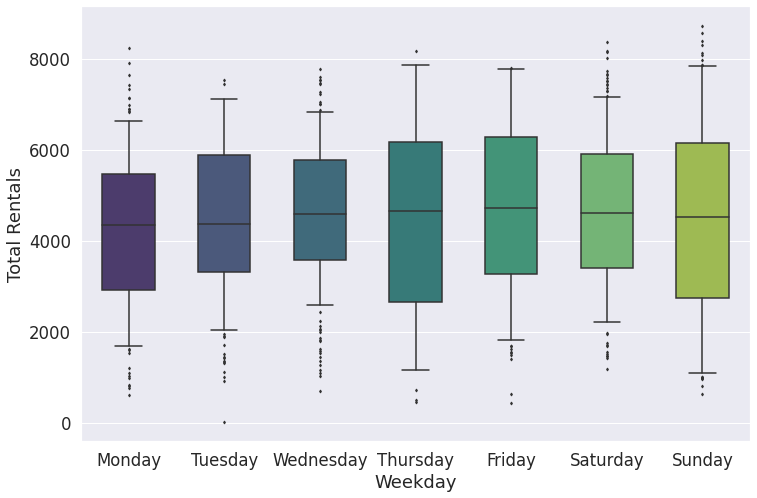

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="weekday", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pyplot.show()

Diferencia de alquieres entre los años 2011 y 2012.

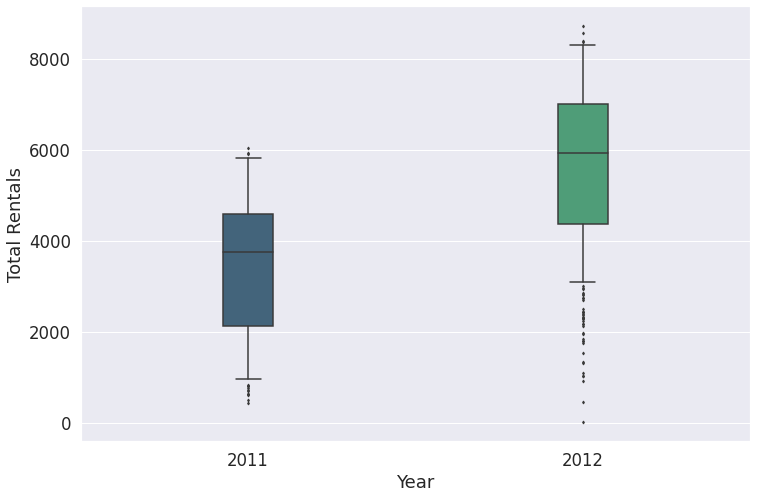

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="yr", y="cnt", data=dataset, width=.15, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
pyplot.xticks([0, 1], ['2011', '2012'])
ax.set_xlabel("Year")
ax.set_ylabel("Total Rentals")
pyplot.show()

Total de alquieres por mes del año.

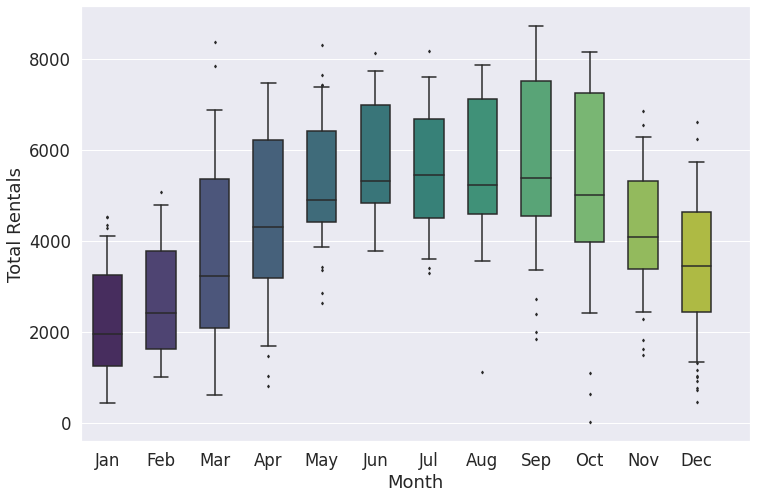

In [ ]:
#darkgrid, whitegrid, dark, white, ticks
sns.set_style("darkgrid")
#paper, notebook, talk, poster
sns.set_context("notebook", font_scale=1.5)
pyplot.figure(figsize=(12,8))
ax = sns.boxplot(x="mnth", y="cnt", data=dataset, width=.55, whis=.5, saturation=.6, fliersize=2,
             notch=False, palette='viridis')
ax.set_xlabel("Month")
ax.set_ylabel("Total Rentals")
pyplot.xticks([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov', 'Dec'])
pyplot.show()

Cantidad de alquieres dependiendo de la temperatura, transformándola al formato de grados celsios 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


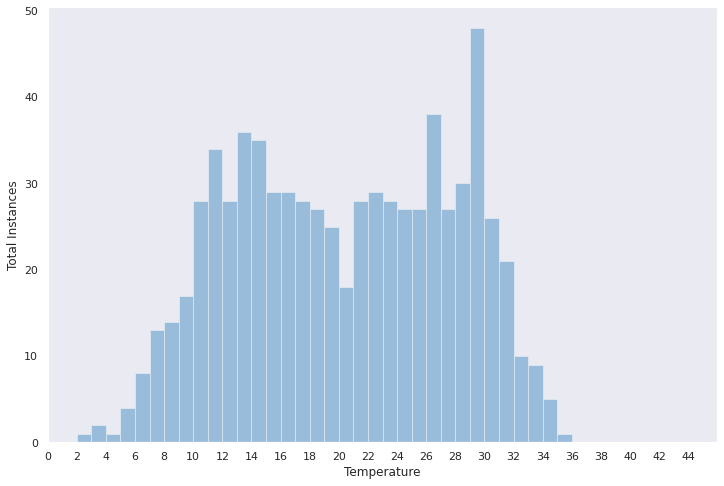

In [ ]:
temp = dataset['temp'].apply(lambda x: x*41)
#atemp = round(dataset['atemp'].apply(lambda x: x*50),2)

#darkgrid, whitegrid, dark, white, ticks
sns.set_style("dark")
pyplot.figure(figsize=(12,8))
#paper, notebook, talk, poster
sns.set_context('notebook')
pyplot.xlim(0, 46)
pyplot.xticks(np.arange(0, 46, 2))
bins = np.arange(0, 50, 1)
x = temp
ax = sns.distplot(x, kde=False, bins=bins)
ax.set_xlabel("Temperature")
ax.set_ylabel("Total Instances")
pyplot.show()

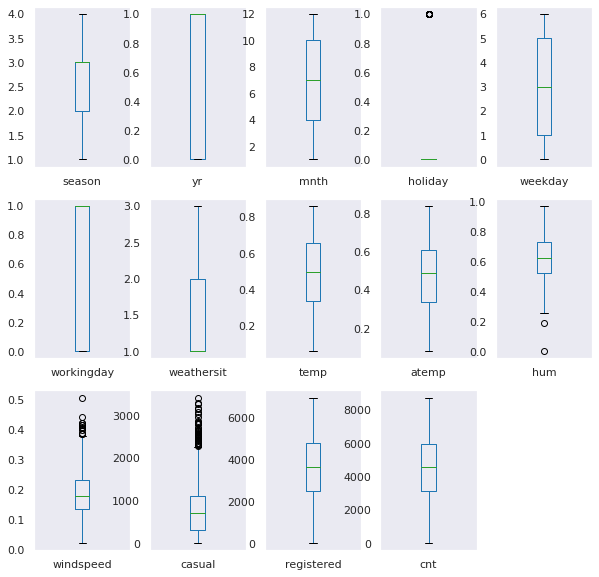

In [ ]:
dataset.plot(kind='box',subplots=True, layout=(3,5), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

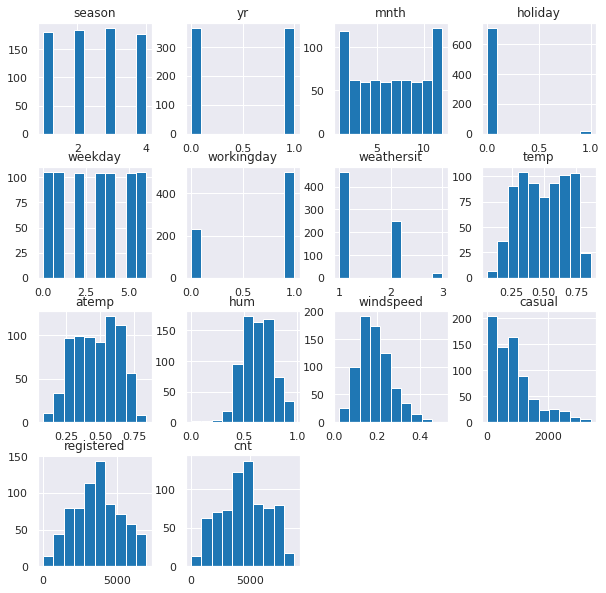

In [ ]:
dataset.hist(figsize=(10,10))
pyplot.show()

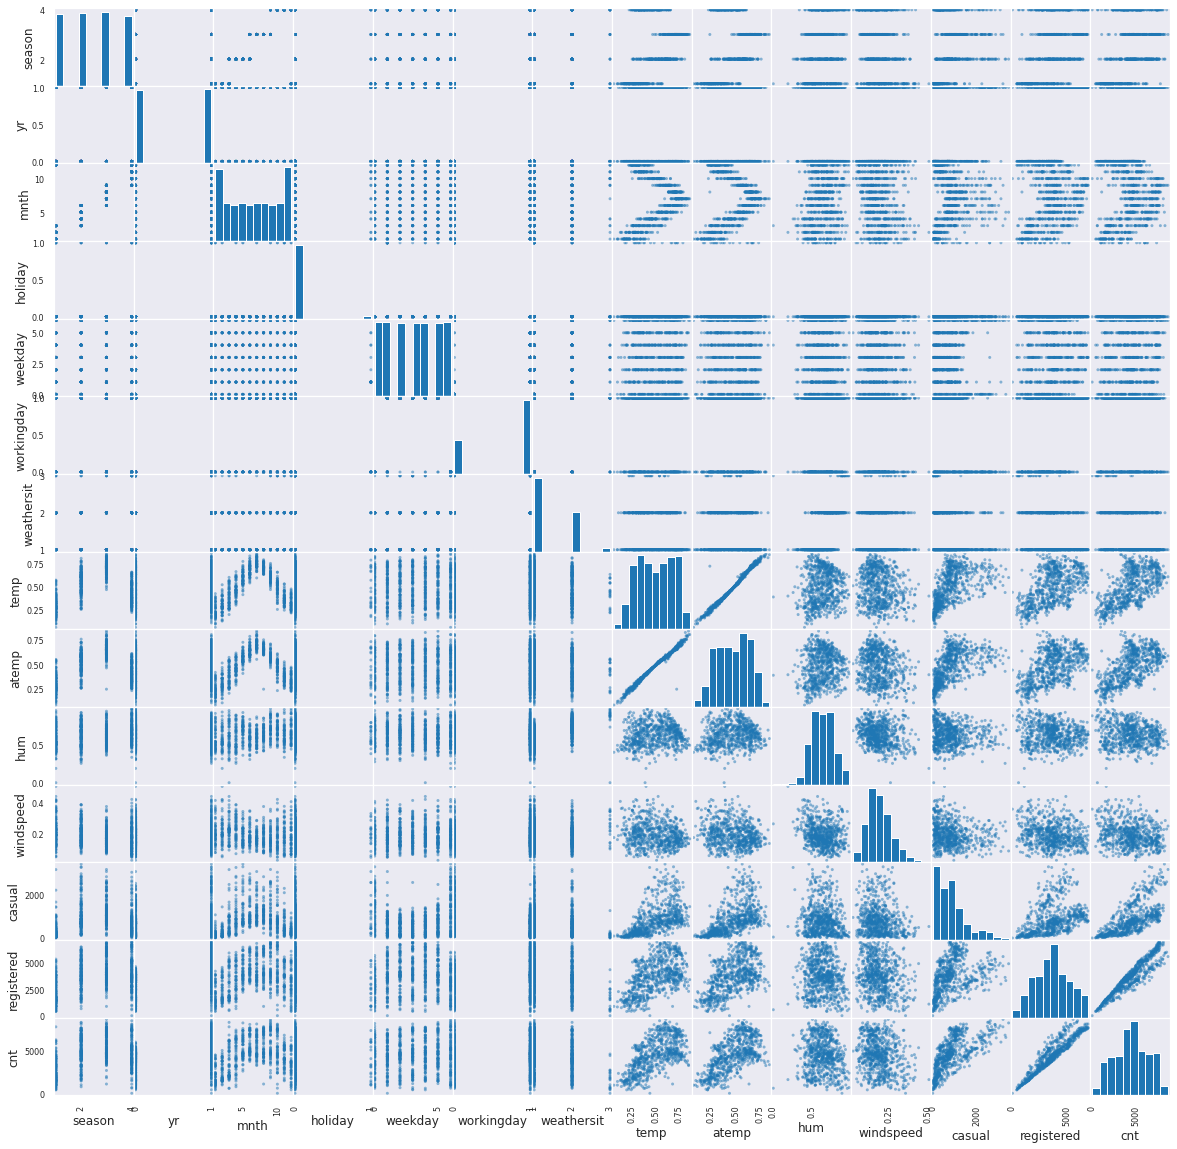

In [ ]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

In [ ]:
array = dataset.values
#X = array[:,0:14]
#y = array[:,14]
X = array[:, :-1]
y = array[:, -1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

In [ ]:
#print(X_train)
#print(len(X_train))

In [ ]:
#print(X_validation)
#print(len(X_train))

In [ ]:
#print(Y_train)

model.fit(X_train, Y_train) pide que Y_train sea enviado en binario, por ello se traduce en la siguiente parte del código.
A su vez, pasamos las fechas a valores numéricos para poder ser tratados más adelante por las funciones .fit y .predict.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

for i in range(len(X_train[:,0])):
  X_train[i,0] = X_train[i,0].replace("-", "")

for j in range(len(X_validation[:,0])):
  X_validation[j,0] = X_validation[j,0].replace("-", "")

for n in range(len(Y_train)):
    Y_train[n] = bin(Y_train[n])

#print(X_train)
#print(Y_train)

In [ ]:
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
#print(X_validation)

In [ ]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
#print(Y_validation)
#print(len(Y_validation))

In [ ]:
for x in range(len(Y_validation)):
    Y_validation[x] = bin(Y_validation[x])
print(accuracy_score(Y_validation, predictions))


0.00546448087431694


In [ ]:
#print(y)

In [ ]:
print(model.predict([[20130101, 1, 1, 12, 0, 1, 1, 2, 0.215833, 0.223487, 0.5775, 0.154846, 439, 2290]]))
print(" ", bin(y[-1]))
print(model.predict([[20130102, 1, 1, 12, 0, 0, 0, 1, 0.255833, 	0.2317, 0.483333, 0.350754, 364, 1432]]))
print(" ", bin(y[-2]))

print(model.predict([[20130103, 1, 1, 12,	0, 6, 0, 2, 0.253333, 0.2424, 0.752917, 0.124383, 159, 1182]]))
print(" ", bin(y[-3]))


print(model.predict([[20110101,	1,	0,	1,	0,	6,	0,	2,	0.344167,	0.363625,	0.805833,	0.160446,	331,	654]]))
print(" ", bin(y[0]))

['0b101010101001']
  0b101010101001
['0b11100000100']
  0b11100000100
['0b11100000100']
  0b10100111101
['0b1100100001']
  0b1111011001
